### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent variable  - the congruency of the colour and text <br>
Dependent Variable - time taken to recognise the color or text (Congruent or Incongruent)

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null Hypothesis : μ(Incongruent) - μ(Congruent) <= 0 <br>
Alternate Hypothesis : μ(Incongruent) - μ(Congruent) > 0 <br><br>

Here, difference in means type of hypothesis seems appropriate. Initial assumption or null hypothesis, is the population mean of time taken during Incongruent test  to name color is the same or less than that of Congruent test. Alternate assumption or the Alternate hypothesis, is the population mean of time taken during Incongruent test to name color is the more than that of Congruent test.

Statistical test that will be used to analyze is Hypothesis testing and the technique used is bootstrapping which is random sampling with replacement. Then get the difference between the mean time taken for Incongruent test and mean time taken for Congruent test. Plot a histogram of the difference, calculate the confidence interval and see if the null falls in this interval.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('stroopdata.csv')

In [35]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [36]:
df.shape

(24, 2)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [38]:
df['Congruent'].mean()

14.051124999999999

In [39]:
df['Incongruent'].mean()

22.015916666666666

In [40]:
difference = df['Incongruent'].mean() - df['Congruent'].mean()
difference

7.9647916666666667

In [41]:
df['Congruent'].std()

3.5593579576451955

In [42]:
df['Incongruent'].std()

4.7970571224691376

In [43]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [44]:
CongruentIQR = 16.20 - 11.89
CongruentIQR

4.309999999999999

In [45]:
IncongruentIQR = 24.05 - 18.72
IncongruentIQR

5.330000000000002

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

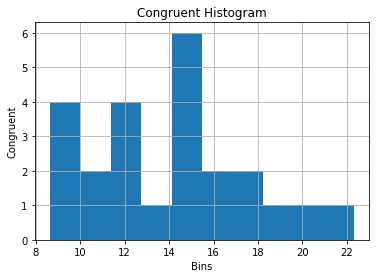

In [16]:
df['Congruent'].hist()
plt.title('Congruent Histogram')
plt.xlabel('Bins')
plt.ylabel('Congruent');

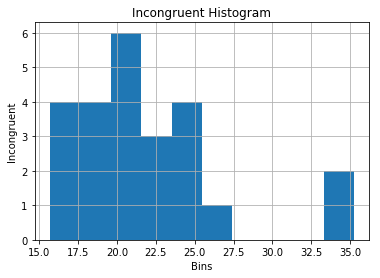

In [17]:
df['Incongruent'].hist()
plt.title('Incongruent Histogram')
plt.xlabel('Bins')
plt.ylabel('Incongruent');

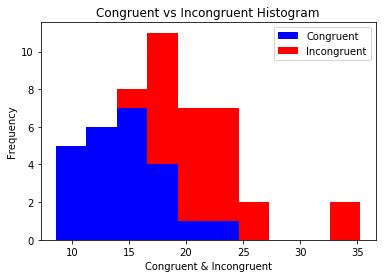

In [47]:
df.plot.hist(bins=10, stacked=True, color=['b','r'])
plt.title('Congruent vs Incongruent Histogram')
plt.xlabel('Congruent & Incongruent');

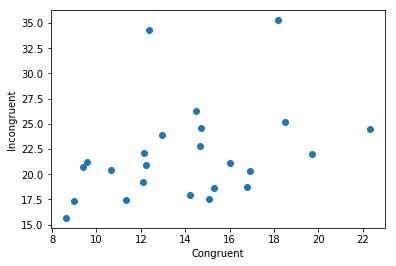

In [69]:
plt.scatter(df['Congruent'], df['Incongruent']);
plt.xlabel('Congruent');
plt.ylabel('Incongruent');

Histograms and sctterplot for Congruent and Incongruent tests are as shown above. Histogram shows the distribution of data. Scatter plot shows that Congruent and Incongruent have a positive relationship, as seen above Incongruent increases as Congruent increases.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [70]:
diffs = []
for i in range(1000):
    b_samp = df.sample(df.shape[0], replace = True)
    con_mean = b_samp['Congruent'].mean()
    Incong_mean = b_samp['Incongruent'].mean()
    diffs.append(Incong_mean - cong_mean)    

In [71]:
np.mean(diffs)

7.6220436666666691

In [72]:
lower, upper = np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

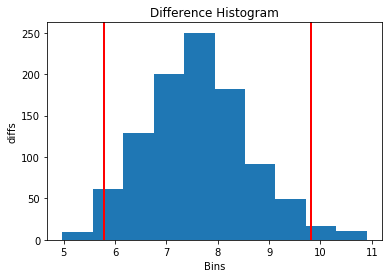

In [73]:
plt.hist(diffs)
plt.title('Difference Histogram')
plt.xlabel('Bins')
plt.ylabel('diffs')
plt.axvline(x=lower, color = 'r', linewidth = 2);
plt.axvline(x=upper, color = 'r', linewidth = 2);

Confidence Interval is between the two red lines in the histogram. <br><br>
**Conclusion** : Upon seeing the Histogram, you can simply look at if the interval falls in the null hypothesis space or alternative hypothesis space to choose which hypothesis you believe to be true. <br>
In the above case, our interval was entirely above 0, which would suggest the null (the population mean is less than 0) is not true. Hence we reject the null hypothesis because of our experiment showed the Incongruency can cause higher reaction time in reading colour names than Congruency. Thus, our alternate hypothesis is correct. 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Causes of Stroop effect** : I think the reason that we fail to recognize the color when it is spelt diffferently is because we are reading the word faster than observing the color of the word. There is brief confusion in performing the task if the word should be read or the color of the word should be said.<br>
Here is a good explaination of what Cause the stroop effect - "There are two theories that may explain the Stroop effect: Speed of Processing Theory: the interference occurs because words are read faster than colors are named. Selective Attention Theory: the interference occurs because naming colors requires more attention than reading words."<br><br>

**Similar Effect** - There are other similar or alternative tasks that would result in a similar effect. Some of the are, Spacial Stroop effect, Numerical Stroop effect, Emotional Stroop effect. 
Simon effect also would result in a similar effect.